In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

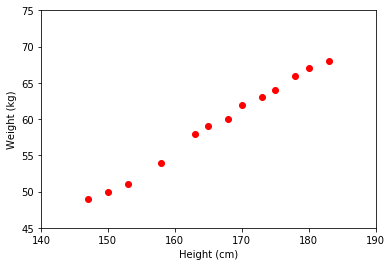

In [3]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T 
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

w =  [[-33.73541021]
 [  0.55920496]]


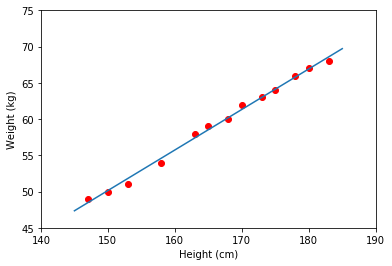

In [4]:
# Building Xbar 
one = np.ones((X.shape[0], 1)) # tạo 1 mảng gồm X.shape[0] = 13 cột 1 hàng, các phần tử bằng 1 
Xbar = np.concatenate((one, X), axis = 1) # Nối ma trận X vào cột thứ axis+1 của ma trận one. 

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)  # Tính w theo công thức giả nghịch đảo của A 
print ('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)  
y0 = w_0 + w_1*x0
#hàm linspace tạo 1 mảng có 2 phần tử, phần tử đầu có giá trị đầu từ 145 và phần tử cuối có giá trị 185 

# Drawing the fitting line 
plt.plot(X.T, y.T, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [5]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print (u'Dự đoán cân nặng của người có chiều cao 155 cm: %.2f (kg), số liệu thật: 52 (kg)'  %(y1)) 
print (u'Dự đoán cân nặng của người có chiều cao 160 cm: %.2f (kg), số liệu thật: 56 (kg)'  %(y2))

Dự đoán cân nặng của người có chiều cao 155 cm: 52.94 (kg), số liệu thật: 52 (kg)
Dự đoán cân nặng của người có chiều cao 160 cm: 55.74 (kg), số liệu thật: 56 (kg)


In [6]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print (u'Nghiệm tìm được bằng scikit-learn  : ', regr.coef_ )
print (u'Nghiệm tìm được từ phương trình (5): ', w.T)

Nghiệm tìm được bằng scikit-learn  :  [[-33.73541021   0.55920496]]
Nghiệm tìm được từ phương trình (5):  [[-33.73541021   0.55920496]]
